# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


In [3]:
df['grupo'].unique()

#Notamos que hay sólo cuatro grupos diferentes en la columna "grupo". 

array(['Grupo_1', 'Grupo_2', 'Grupo_3', 'Grupo_4'], dtype=object)

Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. Gráfique mediante un gráfico tipo scatter cada grupo. A simple vista, ¿los grupos son muy distintos entre sí?

In [4]:
#Primero generamos estos mask para poder separar cada grupo y poder hacer sus scatter.

mask_G1 = (df['grupo']=='Grupo_1')
mask_G2 = (df['grupo']=='Grupo_2')
mask_G3 = (df['grupo']=='Grupo_3')
mask_G4 = (df['grupo']=='Grupo_4')

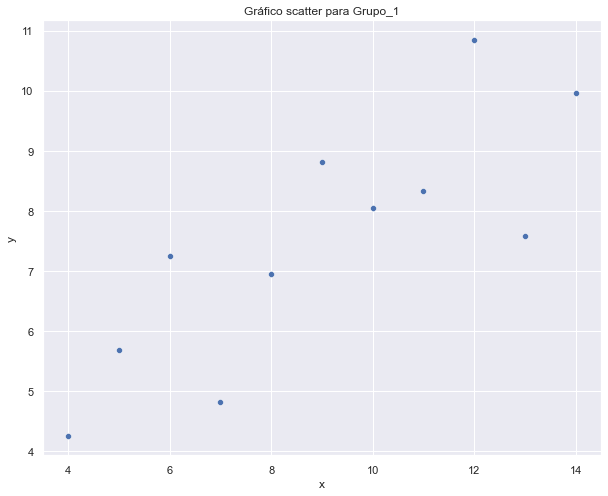

In [5]:
# grafico de puntos Grupo 1:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_G1],
)  
plt.title("Gráfico scatter para Grupo_1")
plt.show()


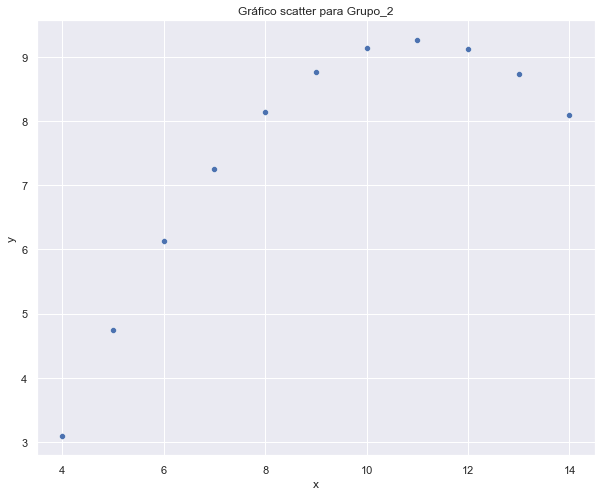

In [6]:
# grafico de puntos Grupo 2:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_G2],
)  
plt.title("Gráfico scatter para Grupo_2")
plt.show()

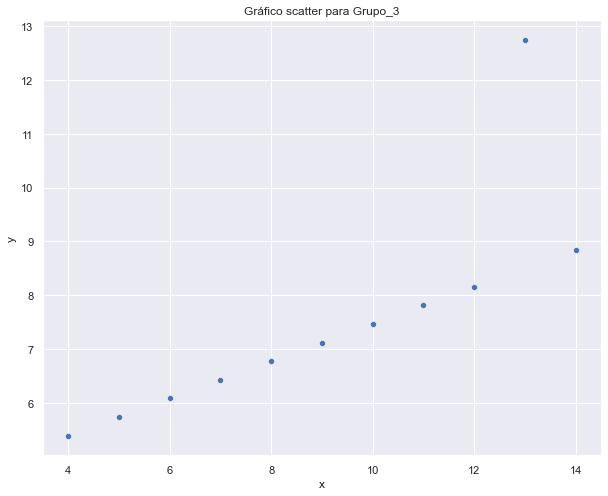

In [7]:
# grafico de puntos Grupo 3:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_G3],
)  
plt.title("Gráfico scatter para Grupo_3")
plt.show()

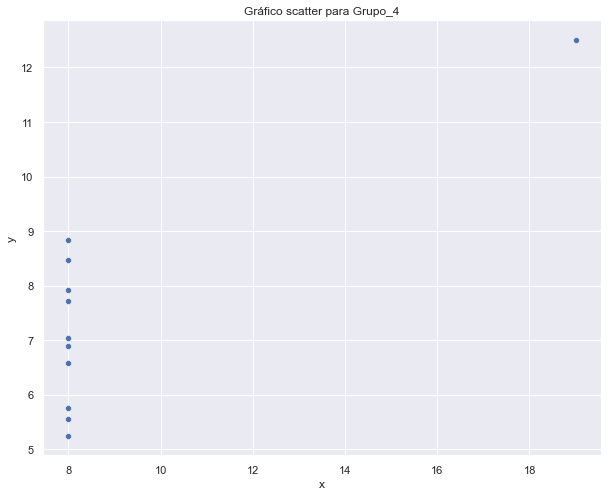

In [8]:
# grafico de puntos Grupo 4:
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=df[mask_G4],
)  
plt.title("Gráfico scatter para Grupo_4")
plt.show()

A simple vista, los grupos son muy diferentes entre sí.

2. Realice un resumen de las medidas estadísticas más significativas ocupando el comando describe para cada grupo. Interprete.

In [9]:
#Resumen medidas estadísticas Grupo_1
df[mask_G1].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [10]:
#Resumen medidas estadísticas Grupo_2
df[mask_G2].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031657
min,4.000000,3.100000
25%,6.500000,6.695000
50%,9.000000,8.140000
75%,11.500000,8.950000
max,14.000000,9.260000


In [11]:
#Resumen medidas estadísticas Grupo_3
df[mask_G3].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500000
std,3.316625,2.030424
min,4.000000,5.390000
25%,6.500000,6.250000
50%,9.000000,7.110000
75%,11.500000,7.980000
max,14.000000,12.740000


In [12]:
#Resumen medidas estadísticas Grupo_4
df[mask_G4].describe()

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.030579
min,8.000000,5.250000
25%,8.000000,6.170000
50%,8.000000,7.040000
75%,8.000000,8.190000
max,19.000000,12.500000


Se puede notar que el número de valores, el promedio y la desviación estándar son muy parecidos en los cuatro grupos (aunque las gráficas de cada grupo sean muy diferentes).

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [13]:
# sklearn models
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from metrics_regression import *
from sklearn.metrics import r2_score

import statsmodels.api as sm



### Ajuste lineal Grupo_1:

In [14]:
#Grupo_1:

X = df[mask_G1][['x']]
y = df[mask_G1]['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

,const,x
10,1.0,5
2,1.0,13
1,1.0,8
8,1.0,12
4,1.0,11
7,1.0,4
3,1.0,9
6,1.0,6


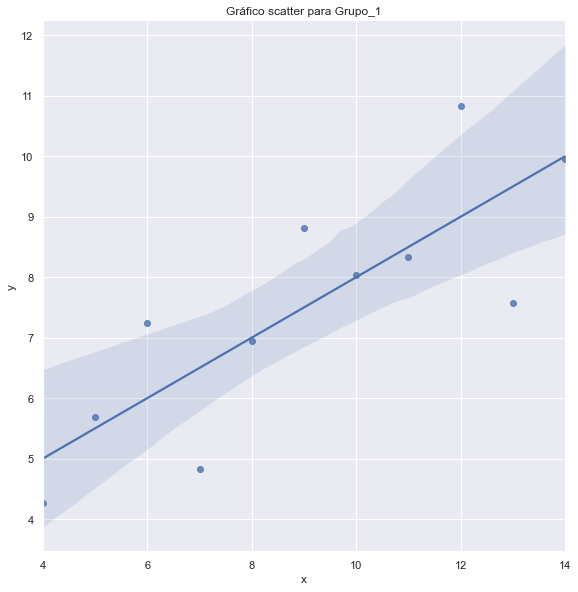

In [16]:
# grafico de puntos con ajuste lineal del Grupo 1:

sns.lmplot(
    x='x',
    y='y',
    data=df[mask_G1],
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_1")
plt.show()


In [17]:
# predicciones
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado


In [18]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

print('\nMetricas para el Grupo_1:\n')
summary_metrics(df_temp)


Metricas para el Grupo_1:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.7161,1.2576,1.1214,0.142,0.1354,0.0941,0.1182,0.1196


In [19]:
results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     9.834
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0202
Time:                        22:21:17   Log-Likelihood:                -12.443
No. Observations:                   8   AIC:                             28.89
Df Residuals:                       6   BIC:                             29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4668      1.357      2.555      0.043       0.146       6.787
x              0.4699      0.150      3.136      0.020       0.103       0.837
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.314
Skew:                          -0.151   Prob(JB):                        0.855
Kurtosis:                       2.078   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ajuste lineal Grupo_2:

In [20]:
#Grupo_2:

X = df[mask_G2][['x']]
y = df[mask_G2]['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
model = sm.OLS(y_train, sm.add_constant(X_train)) 
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

,const,x
21,1.0,5
13,1.0,13
12,1.0,8
19,1.0,12
15,1.0,11
18,1.0,4
14,1.0,9
17,1.0,6


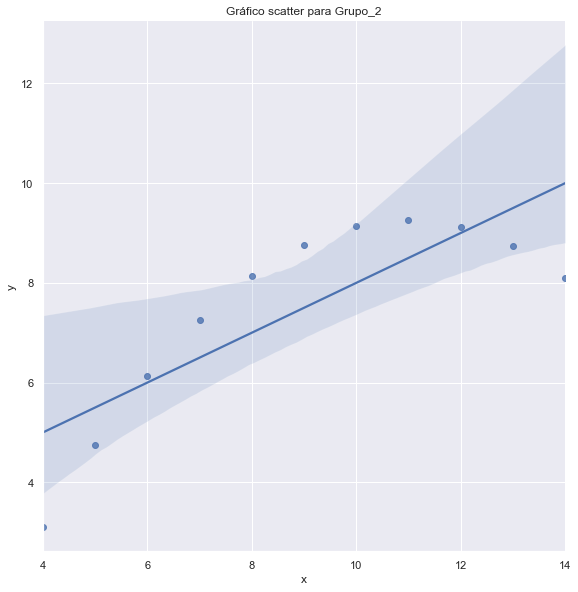

In [22]:
# grafico de puntos con ajuste lineal del Grupo 2:

sns.lmplot(
    x='x',
    y='y',
    data=df[mask_G2],
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_2")
plt.show()

In [23]:
# predicciones
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado


In [24]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

print('\nMetricas para el Grupo_2:\n')
summary_metrics(df_temp)


Metricas para el Grupo_2:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,1.4986,2.8504,1.6883,0.1851,0.1813,0.1835,0.1647,0.1752


In [25]:
results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     26.13
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00220
Time:                        22:21:17   Log-Likelihood:                -10.838
No. Observations:                   8   AIC:                             25.68
Df Residuals:                       6   BIC:                             25.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9240      1.110      1.733      0.134      -0.793       4.641
x              0.6267      0.123      5.111      0.002       0.327       0.927
==============================================================================
Omnibus:                        0.954   Durbin-Watson:                   2.910
Prob(Omnibus):                  0.621   Jarque-Bera (JB):                0.594
Skew:                          -0.169   Prob(JB):                        0.743
Kurtosis:                       1.709   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ajuste lineal Grupo_3:

In [26]:
#Grupo_3:

X = df[mask_G3][['x']]
y = df[mask_G3]['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
model = sm.OLS(y_train, sm.add_constant(X_train)) 
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

,const,x
32,1.0,5
24,1.0,13
23,1.0,8
30,1.0,12
26,1.0,11
29,1.0,4
25,1.0,9
28,1.0,6


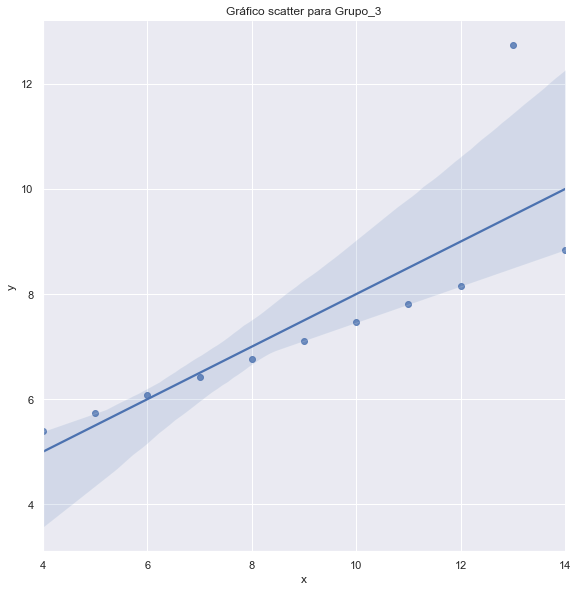

In [28]:
# grafico de puntos con ajuste lineal del Grupo 3:

sns.lmplot(
    x='x',
    y='y',
    data=df[mask_G3],
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_3")
plt.show()


In [29]:
# predicciones
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado


In [30]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

print('\nMetricas para el Grupo_3:\n')
summary_metrics(df_temp)


Metricas para el Grupo_3:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.9813,1.4548,1.2062,0.1196,0.1184,0.1296,0.1065,0.1105


In [31]:
results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     14.71
Date:                Wed, 10 Nov 2021   Prob (F-statistic):            0.00860
Time:                        22:21:19   Log-Likelihood:                -12.655
No. Observations:                   8   AIC:                             29.31
Df Residuals:                       6   BIC:                             29.47
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4553      1.393      1.762      0.129      -0.954       5.865
x              0.5903      0.154      3.836      0.009       0.214       0.967
==============================================================================
Omnibus:                        5.010   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                1.489
Skew:                           1.037   Prob(JB):                        0.475
Kurtosis:                       3.403   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Ajuste lineal Grupo_4:

In [32]:
#Grupo_4:

X = df[mask_G4][['x']]
y = df[mask_G4]['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
model = sm.OLS(y_train, sm.add_constant(X_train)) 
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

,const,x
43,1.0,8
35,1.0,8
34,1.0,8
41,1.0,8
37,1.0,8
40,1.0,19
36,1.0,8
39,1.0,8


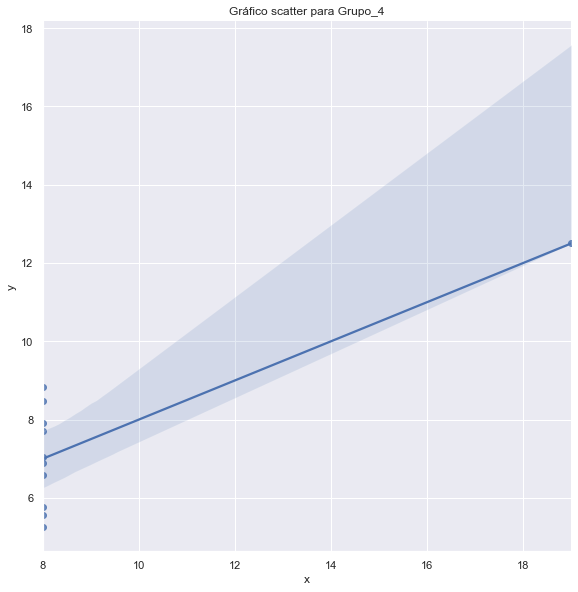

In [34]:
# grafico de puntos con ajuste lineal del Grupo 4:

sns.lmplot(
    x='x',
    y='y',
    data=df[mask_G4],
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_4")
plt.show()


In [35]:
# predicciones
y_pred = results.predict(sm.add_constant(y_test)) #sé que acá debería poner X_test en vez de y_test
#pero me arroja error y mandé un correo preguntando qué pasaba y no recibí respuesta :(
#por ello puse y_test para que funcionara el código.

In [36]:
df_temp = pd.DataFrame(
    {
        'y':y_test,
        'yhat': y_pred
        }
)

print('\nMetricas para el Grupo_4:\n')
summary_metrics(df_temp)


Metricas para el Grupo_4:



,mae,mse,rmse,mape,maape,wmape,mmape,smape
0,0.6682,0.5205,0.7214,0.0908,0.0905,0.0931,0.0799,0.0956


In [37]:
results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     12.85
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0116
Time:                        22:21:19   Log-Likelihood:                -13.199
No. Observations:                   8   AIC:                             30.40
Df Residuals:                       6   BIC:                             30.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8717      1.422      2.020      0.090      -0.607       6.351
x              0.5068      0.141      3.584      0.012       0.161       0.853
==============================================================================
Omnibus:                        1.324   Durbin-Watson:                   2.514
Prob(Omnibus):                  0.516   Jarque-Bera (JB):                0.661
Skew:                           0.146   Prob(JB):                        0.719
Kurtosis:                       1.623   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Notamos que el ajuste lineal de los cuatro grupos no es muy bueno pues el coeficiente R^2 es mucho menor a 1.**

4. Calcule los resultados de las métricas para cada grupo. Interprete.

### **Las métricas pedidas fueron calculadas en el apartado anterior.**

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.

### **Para que el modelo de regresión se ajuste de mejor manera podemos identificar los datos outliers y eliminarlos para así poder hacer un ajuste lineal más fidedigno (ya que los outliers pueden modificar mucho (y de mala manera) el modelo de regresión).**

In [38]:
from sklearn import linear_model
from sklearn import tree
from sklearn import svm
from sklearn import neighbors

In [39]:
#Función para remover los outliers según el rango intercuartil de cada dato.
#Se calculan los cuartiles y dejamos los datos que estén en el rango indicado.

def remove_outlier(df, columna):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    rango_int = q3-q1 #rango intercuartil
    bajo  = q1-1.5*rango_int
    alto = q3+1.5*rango_int
    df2 = df.loc[(df[columna] > bajo) & (df[columna] < alto)]
    return df2

In [40]:
#Remuevo outliers del Grupo_1:
a = remove_outlier(df[mask_G1],'y')

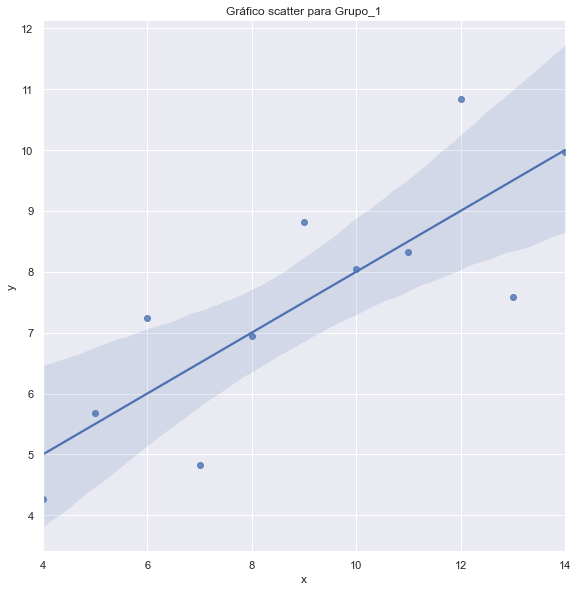

In [41]:
#Gráfica Grupo_1 sin outliers:

X = a[['x']]
y = a['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

# grafico de puntos con ajuste lineal del Grupo 1:

sns.lmplot(
    x='x',
    y='y',
    data = a,
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_1")
plt.show()

In [42]:
# predicciones sin outliers Grupo_1:
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado

results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     9.834
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0202
Time:                        22:21:20   Log-Likelihood:                -12.443
No. Observations:                   8   AIC:                             28.89
Df Residuals:                       6   BIC:                             29.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4668      1.357      2.555      0.043       0.146       6.787
x              0.4699      0.150      3.136      0.020       0.103       0.837
==============================================================================
Omnibus:                        0.120   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.314
Skew:                          -0.151   Prob(JB):                        0.855
Kurtosis:                       2.078   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Remuevo outliers del Grupo_2:
b = remove_outlier(df[mask_G2],'y')

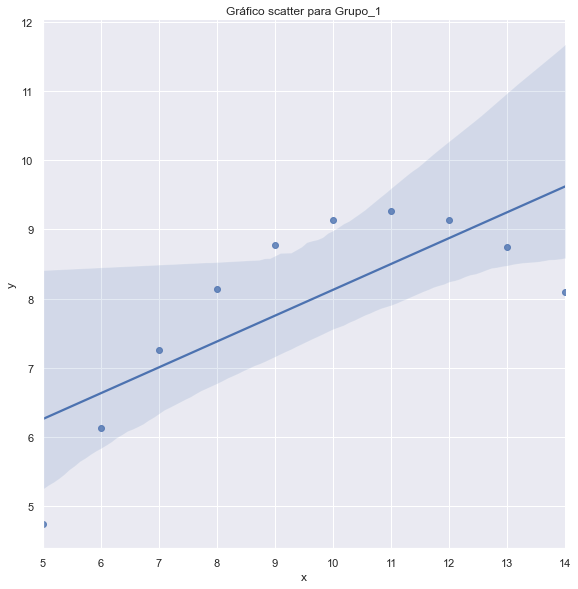

In [44]:
#Gráfica Grupo_2 sin outliers:

X = b[['x']]
y = b['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

# grafico de puntos con ajuste lineal del Grupo 2:

sns.lmplot(
    x='x',
    y='y',
    data = b,
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_1")
plt.show()

In [45]:
# predicciones sin outliers Grupo_2:
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado

results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     9.272
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0227
Time:                        22:21:21   Log-Likelihood:                -11.166
No. Observations:                   8   AIC:                             26.33
Df Residuals:                       6   BIC:                             26.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9526      1.388      2.847      0.029       0.556       7.349
x              0.4049      0.133      3.045      0.023       0.080       0.730
==============================================================================
Omnibus:                        1.403   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.496   Jarque-Bera (JB):                0.704
Skew:                          -0.239   Prob(JB):                        0.703
Kurtosis:                       1.627   Cond. No.                         36.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Remuevo outliers del Grupo_3:
c = remove_outlier(df[mask_G3],'y')

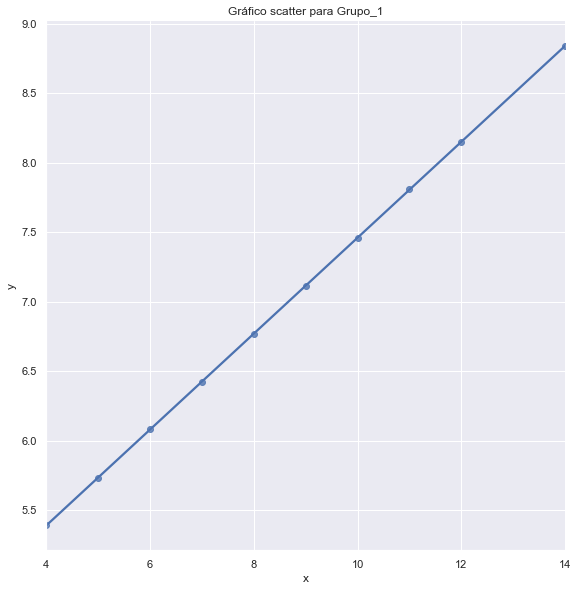

In [47]:
#Gráfica Grupo_3 sin outliers:

X = c[['x']]
y = c['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

# grafico de puntos con ajuste lineal del Grupo 3:

sns.lmplot(
    x='x',
    y='y',
    data = c,
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_1")
plt.show()

In [48]:
# predicciones sin outliers Grupo_3:
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado

results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.023e+06
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.31e-17
Time:                        22:21:22   Log-Likelihood:                 35.709
No. Observations:                   8   AIC:                            -67.42
Df Residuals:                       6   BIC:                            -67.26
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0064      0.003   1237.737      0.000       3.999       4.014
x              0.3453      0.000   1011.403      0.000       0.344       0.346
==============================================================================
Omnibus:                        0.032   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.984   Jarque-Bera (JB):                0.196
Skew:                           0.100   Prob(JB):                        0.907
Kurtosis:                       2.260   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
#Remuevo outliers del Grupo_4:
d = remove_outlier(df[mask_G4],'y')

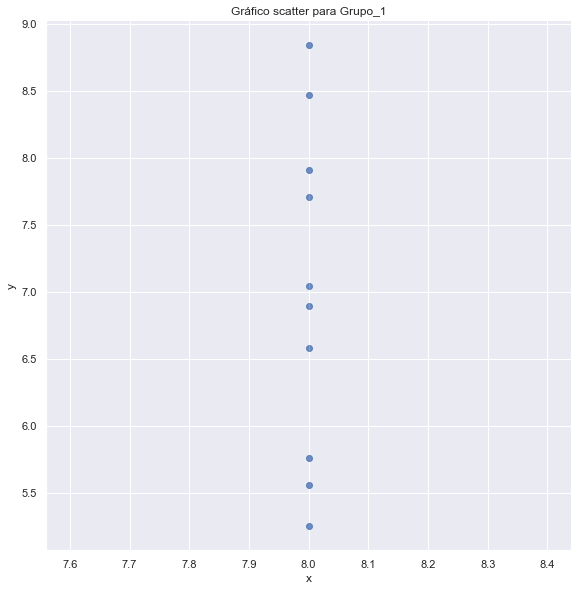

In [50]:
#Gráfica Grupo_4 sin outliers:

X = d[['x']]
y = d['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(y_train, sm.add_constant(X_train))
results = model.fit() #.fit me ajusta el modelo
sm.add_constant(X_train)

# grafico de puntos con ajuste lineal del Grupo 4:

sns.lmplot(
    x='x',
    y='y',
    data = d,
    height = 8,
)  
plt.title("Gráfico scatter para Grupo_1")
plt.show()

In [51]:
# predicciones sin outliers Grupo_4:
y_pred = results.predict(sm.add_constant(X_test)) #results es mi modelo entrenado

results.summary()

C:\Users\Javiera\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 10 Nov 2021   Prob (F-statistic):                nan
Time:                        22:21:22   Log-Likelihood:                -12.755
No. Observations:                   8   AIC:                             27.51
Df Residuals:                       7   BIC:                             27.59
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x              0.8803      0.056     15.635      0.000       0.747       1.013
==============================================================================
Omnibus:                        0.399   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.819   Jarque-Bera (JB):                0.434
Skew:                          -0.008   Prob(JB):                        0.805
Kurtosis:                       1.858   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **Finalmente, notamos ahora que sin outliers el R^2 para algunos casos se acerca mucho más a 1 que en los casos con outliers.**